In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler as m
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import streamlit as st

In [2]:
start = '2010-01-01'
end = '2019-12-31'
yfin.pdr_override()

df = pdr.get_data_yahoo('AAPL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [3]:
df = df.reset_index()
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Volume
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000
2514,72.364998,73.172501,71.305000,72.879997,144114400


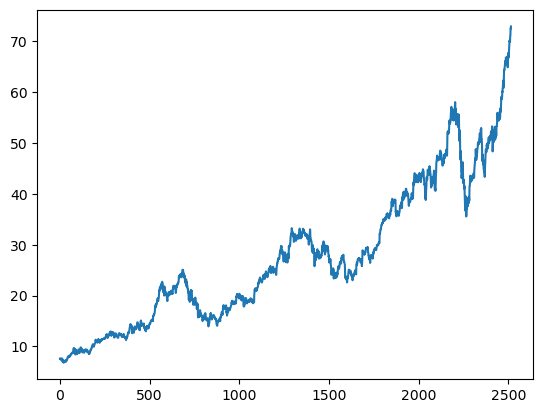

In [5]:
plt.plot(df.Close)

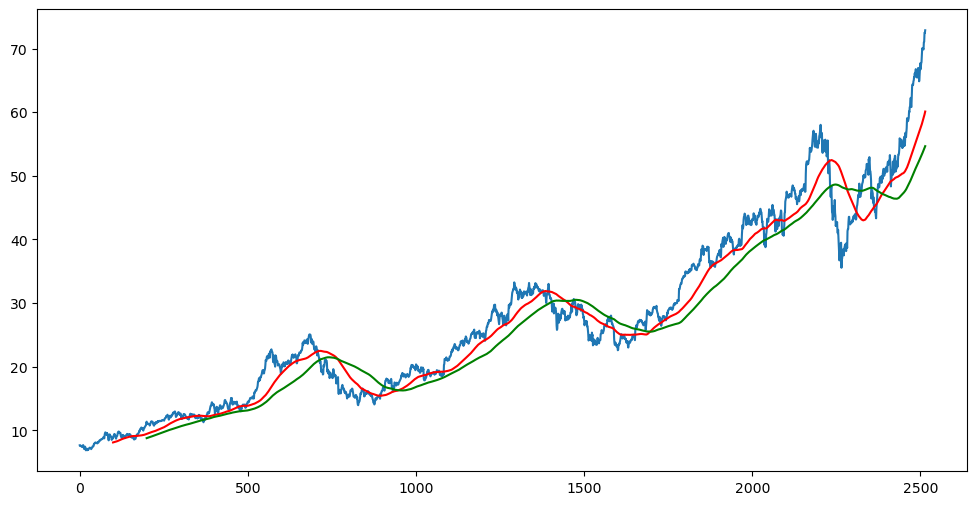

In [6]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200, 'g')

In [7]:
# Splitting Data

data_training =pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [8]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [9]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [10]:
scaler = m(feature_range=(0,1))

In [11]:
data_train_array = scaler.fit_transform(data_training)
data_train_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [12]:
x_train, y_train = [], []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i, 0])  # Take the first column of each slice
    y_train.append(data_train_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [13]:
x_train.shape

(1660, 100)

In [14]:
# Define a function to calculate error percentage
def calculate_error_percentage(mse, y_actual):
    # Calculate Error Percentage
    error_percentage = (mse / np.mean(y_actual)) * 100
    return error_percentage

In [15]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Model 1: Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)


# Model 2: Support Vector Machine
svm_model = SVR()
svm_model.fit(x_train, y_train)


# Model 3: Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)


# Predictions
dt_predictions = dt_model.predict(x_val)
svm_predictions = svm_model.predict(x_val)
rf_predictions = rf_model.predict(x_val)

# Evaluate models
dt_mse = mean_squared_error(y_val, dt_predictions)
svm_mse = mean_squared_error(y_val, svm_predictions)
rf_mse = mean_squared_error(y_val, rf_predictions)

# Calculate error percentage for each model
dt_error_percentage = calculate_error_percentage(dt_mse, y_val)
svm_error_percentage = calculate_error_percentage(svm_mse, y_val)
rf_error_percentage = calculate_error_percentage(rf_mse, y_val)

print(f"Decision Tree Mean Squared Error: {dt_mse}")
print(f"SVM Mean Squared Error: {svm_mse}")
print(f"Random Forest Mean Squared Error: {rf_mse}")

print(f'Decision Tree Error Percentage: {dt_error_percentage}%')
print(f'SVM Error Percentage: {svm_error_percentage}%')
print(f'Random Forest Error Percentage: {rf_error_percentage}%')

Decision Tree Mean Squared Error: 0.0003921617756656433
SVM Mean Squared Error: 0.0021855453138643617
Random Forest Mean Squared Error: 0.0002455798116190031
Decision Tree Error Percentage: 0.07696519192129783%
SVM Error Percentage: 0.4289324584190993%
Random Forest Error Percentage: 0.04819719438787884%


In [16]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [17]:
past_1oo_days = data_training.tail(100)
final_df = past_1oo_days.append(data_testing, ignore_index = True)
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [18]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(855, 1)

In [19]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i, 0])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100)
(755,)


In [20]:
# Making Predictions

dt_y_pred = dt_model.predict(x_test)

svm_y_pred = svm_model.predict(x_test)

rf_y_pred = rf_model.predict(x_test)



In [21]:
print(dt_y_pred.shape)
print(svm_y_pred.shape)
print(rf_y_pred.shape)

(755,)
(755,)
(755,)


In [22]:
scaler.scale_

array([0.02123255])

In [23]:
scale_factor = 1/0.02123255

dt_y_pred = dt_y_pred* scale_factor

svm_y_pred = svm_y_pred* scale_factor

rf_y_pred = rf_y_pred* scale_factor

y_test = y_test* scale_factor

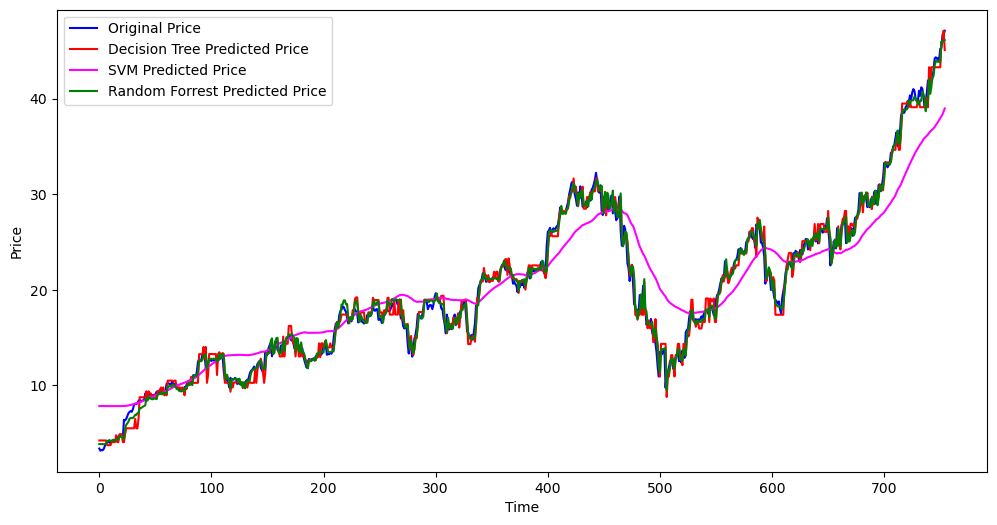

In [24]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(dt_y_pred, 'r', label="Decision Tree Predicted Price")
plt.plot(svm_y_pred, 'magenta', label="SVM Predicted Price")
plt.plot(rf_y_pred, 'g', label="Random Forrest Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

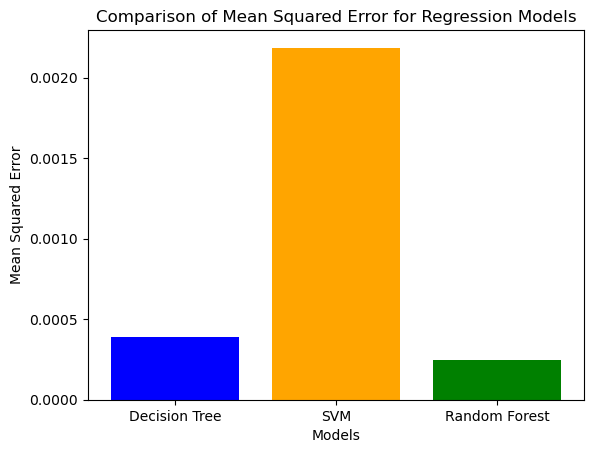

In [25]:
# Compare the performance of the models
mse_values = [dt_mse, svm_mse, rf_mse]
models = ['Decision Tree', 'SVM', 'Random Forest']

# Plot Mean Squared Error for each model
plt.bar(models, mse_values, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Regression Models')
plt.show()
